In [3]:
#conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [6]:
import torch
import os
import torchvision
import torchvision.transforms as transforms

In [17]:
os.listdir('./dataset_10_classes/dataset_10_classes/')

['Apple_healthy',
 'Apple_unhealthy',
 'Corn_healthy',
 'Corn_unhealthy',
 'Grape_healthy',
 'Grape_unhealthy',
 'Potato_healthy',
 'Potato_unhealthy',
 'Tomato_healthy',
 'Tomato_unhealthy']

In [ ]:
dataset_path = './dataset_10_classes/dataset_10_classes/'

In [10]:
data_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

In [13]:
dataset = torchvision.datasets.ImageFolder(root = dataset_path,transform = data_transforms)

In [14]:
data_loader = torch.utils.data.DataLoader(dataset = dataset,batch_size=32,shuffle=False)

In [15]:
def get_mean_and_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images, _ in loader:
        image_count_in_a_batch = images.size(0)
        images = images.view(image_count_in_a_batch,images.size(1),-1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += image_count_in_a_batch
    mean /= total_images_count
    std /= total_images_count
    return mean,std

In [18]:
mean,std = get_mean_and_std(data_loader)

In [41]:
data_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
])

In [42]:
dataset = torchvision.datasets.ImageFolder(root = dataset_path,transform = data_transforms)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset,batch_size = 6,shuffle=True)
    batch = next(iter(loader))
    images,labels = batch
    
    grid = torchvision.utils.make_grid(images,nrow = 3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid,(1,2,0)))
    print('labels',labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels tensor([2, 9, 5, 8, 2, 9])


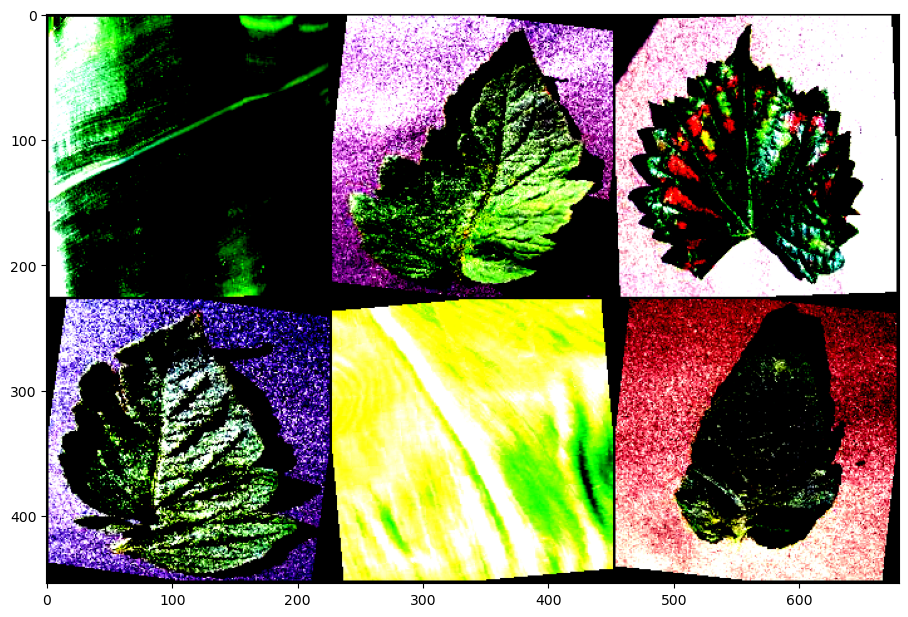

In [45]:
show_transformed_images(dataset)